In [1]:
push!(LOAD_PATH, ".")  # Append current directory to Julia LOAD_PATH

using RocketUtils
using Plots, LaTeXStrings

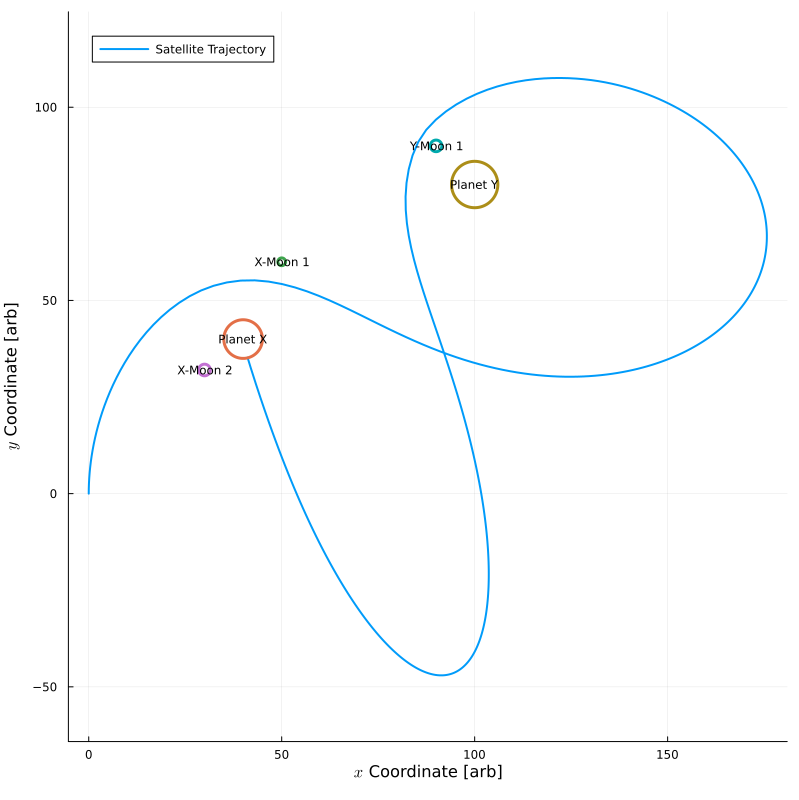

In [5]:
mass = 1.  # Target mass
r0 = [0. ; 0.]  # Initial position
v0 = [-0. ; 1.3]  # Initial velocity

pl_x = Body(1e6, [40.; 40.], 5., "Planet X")
xmn_1 = Body(1e4, [50.; 60.], 1., "X-Moon 1")
xmn_2 = Body(1e4, [30.; 32.], 1.5, "X-Moon 2")
pl_y = Body(1e6, [100.; 80.], 6., "Planet Y")
ymn_1 = Body(1e5, [90.; 90.], 1.5, "Y-Moon 1")


objs = [pl_x ; xmn_1 ; xmn_2 ; pl_y ; ymn_1]  # List of objects

T = 1000  # Time for simulation

sol = let mass=mass, r0=r0, v0=v0, T=T, objs=objs
    solve_rocket_ODE(mass, r0, v0, T, objs)
end

p = plot(;size=(800, 800),
    xlabel=L"x" * " Coordinate [arb]",
    ylabel=L"y" * " Coordinate [arb]",
    aspect_ratio=:equal)
ts = range(0, T; length=1000)

plot!(p, sol(ts)[1,:], sol(ts)[2,:], lw=2, label="Rocket Trajectory")
for ob in objs
    plot!(p, obj_circle(ob), lw=3, label=nothing)
    annotate!(p, ob.r[1], ob.r[2], ob.label, 8)
end

display(p)